# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [3]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split

Let's generate our dataset and take a look on it.

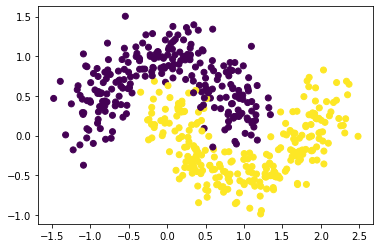

In [204]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)
X_train, X_test, y_train, y_test = train_test_split(moons_points, moons_labels, test_size=0.33, random_state=42)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [160]:
def plot(X, y, clf):
    plot_decision_regions(X, y, clf, colors="skyblue,orchid", markers='o')
    
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])

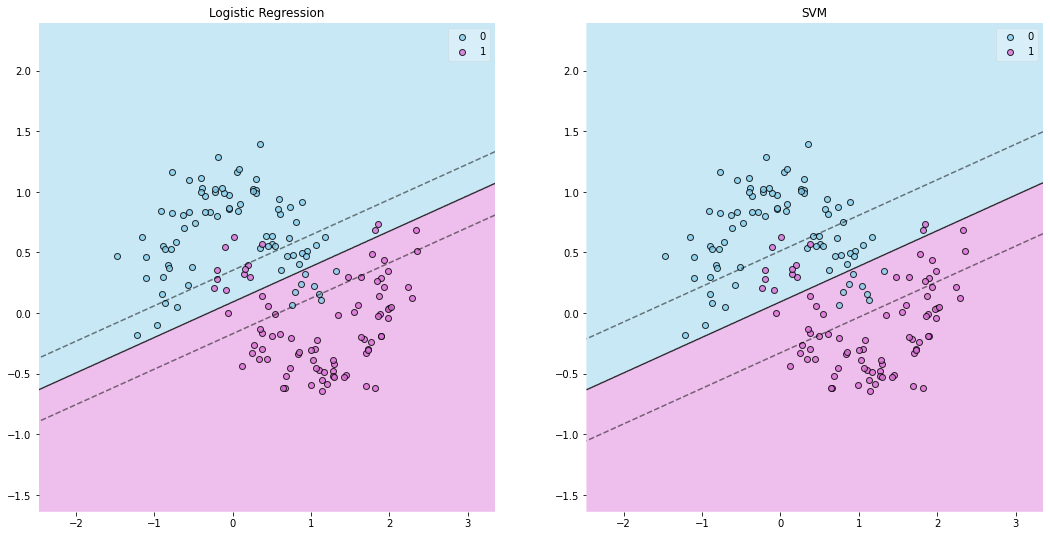

In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.gridspec as gridspec
from mlxtend.plotting import plot_decision_regions

lr = LogisticRegression(C=1, penalty='l2', max_iter=500, fit_intercept=True).fit(X_train, y_train)
svm = SVC(C=1, kernel='linear', max_iter=500).fit(X_train, y_train)

gs = gridspec.GridSpec(1, 2)

labels = ['Logistic Regression', 'SVM']
plt.figure(figsize=(18, 9))
for clf, lab, i in zip([lr, svm], labels, [0, 1]):
    ax = plt.subplot(gs[i])
    fig = plot(X_test, y_test, clf=clf)
    plt.title(lab)

plt.show()

In [162]:
from sklearn.metrics import accuracy_score

print('Logistic accuracy = ', accuracy_score(y_test, lr.predict(X_test)))
print('SVM accuracy = ', accuracy_score(y_test, svm.predict(X_test)))

Logistic accuracy =  0.8727272727272727
SVM accuracy =  0.8727272727272727


**Note:** with the same C = 1 these methods match, which is not suprising, because of their implementation. They don't do a good job at classification problem in our case, because classes are not linearly separable.

## 1.2 Kernel tirck

![keep-calm](https://github.com/girafe-ai/ml-mipt/blob/basic_s21/homeworks_basic/Lab1_ML_pipeline_and_SVM/imgs/keep-calm.jpg?raw=1)

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

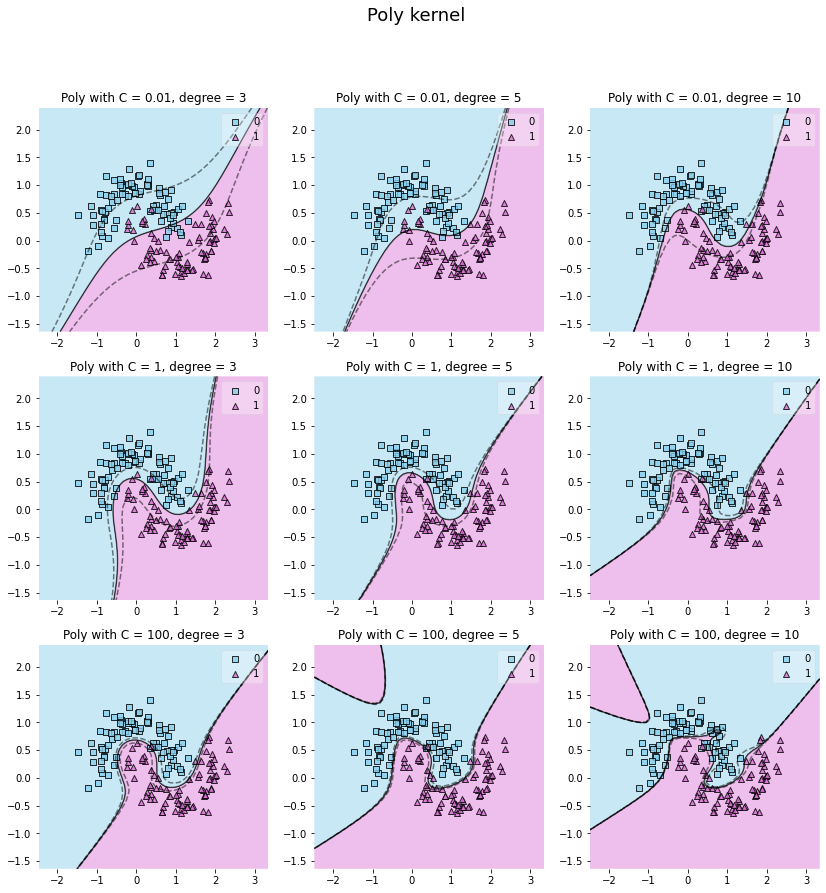

In [127]:
import itertools
import warnings

warnings.filterwarnings('ignore')

gs = gridspec.GridSpec(3, 3)
fig = plt.figure(figsize=(14, 14))

C = [10 ** -2, 1, 10 ** 2]
degrees = [3, 5, 10]
grid = list(itertools.product(C, degrees))
svm_poly = [make_pipeline(StandardScaler(), SVC(coef0=1, C=C, kernel='poly', degree=degree, max_iter=500)) for C, degree in grid]

labels = ['Poly with C = {}, degree = {}'.format(C, degree) for C, degree in grid]

for clf, lab, i in zip(svm_poly, labels, np.arange(9)):
    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[i])
    fig = plot(X_test, y_test, clf=clf)
    plt.title(lab)

plt.suptitle("Poly kernel", fontsize=18)
plt.show()

**Note:** The best params are (C = 1, degree = 3), and also (C = 0.01, degree = 10).
But for such hight degree as 10 we need much more time to calculate, that's why I will got with (1, 3).
Let's calculate accuracy for it.

In [134]:
pipe = make_pipeline(StandardScaler(), SVC(coef0=1, C=1, kernel='poly', degree=3, max_iter=500))
pipe.fit(X_train, y_train)
print(pipe.score(X_test, y_test))

0.9818181818181818


**This is a very good result**

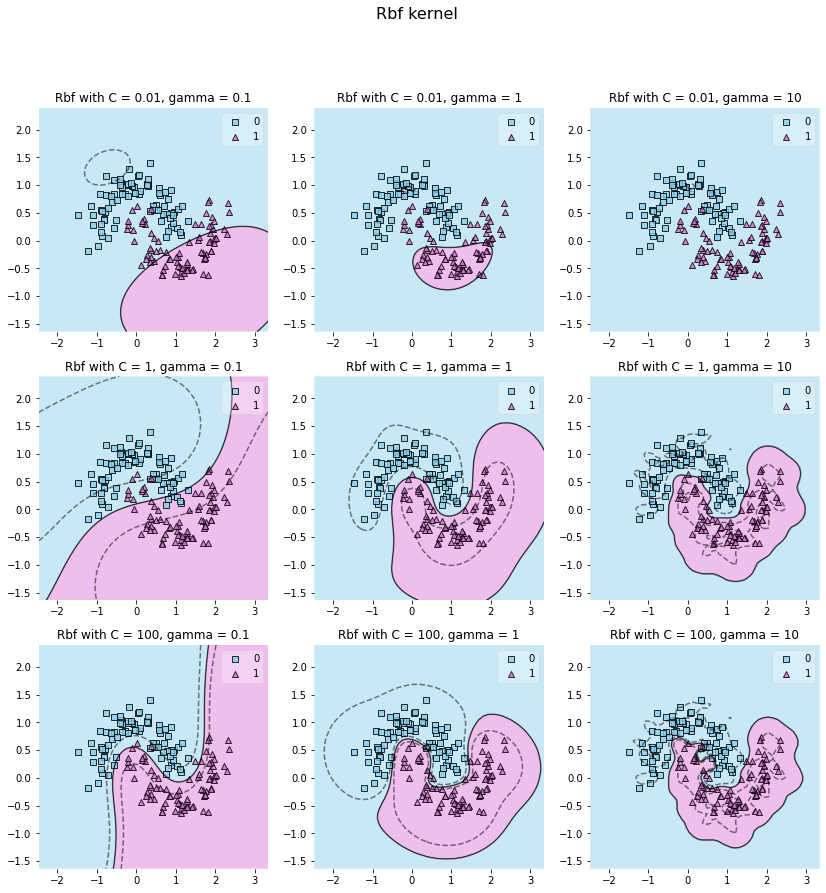

In [136]:
import itertools
import warnings

warnings.filterwarnings('ignore')

gs = gridspec.GridSpec(3, 3)
fig = plt.figure(figsize=(14, 14))

gamma = [10 ** -1, 1, 10 ]
C = [10 ** -2, 1, 10 ** 2]
grid = list(itertools.product(C, gamma))
svm_rbf = [make_pipeline(StandardScaler(), SVC(C=C, kernel='rbf', gamma=gamma, max_iter=500)) for C, gamma in grid]

labels = ['Rbf with C = {}, gamma = {}'.format(C, gamma) for C, gamma in grid]

for clf, lab, i in zip(svm_rbf, labels, np.arange(9)):
    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[i])
    fig = plot(X_test, y_test, clf=clf)
    plt.title(lab)

plt.suptitle("Rbf kernel", fontsize=16)
plt.show()

**Note:** Rbf with C = 100 and gamma = 0.1 workes well. Let's calculate accuracy.

In [208]:
pipe = make_pipeline(StandardScaler(), SVC(C=100, kernel='rbf', gamma=0.1, max_iter=500))
pipe.fit(X_train, y_train)
print('accuracy =  ', pipe.score(X_test, y_test))

accuracy =   0.9818181818181818


**It's the same as Poly with degree = 3.**

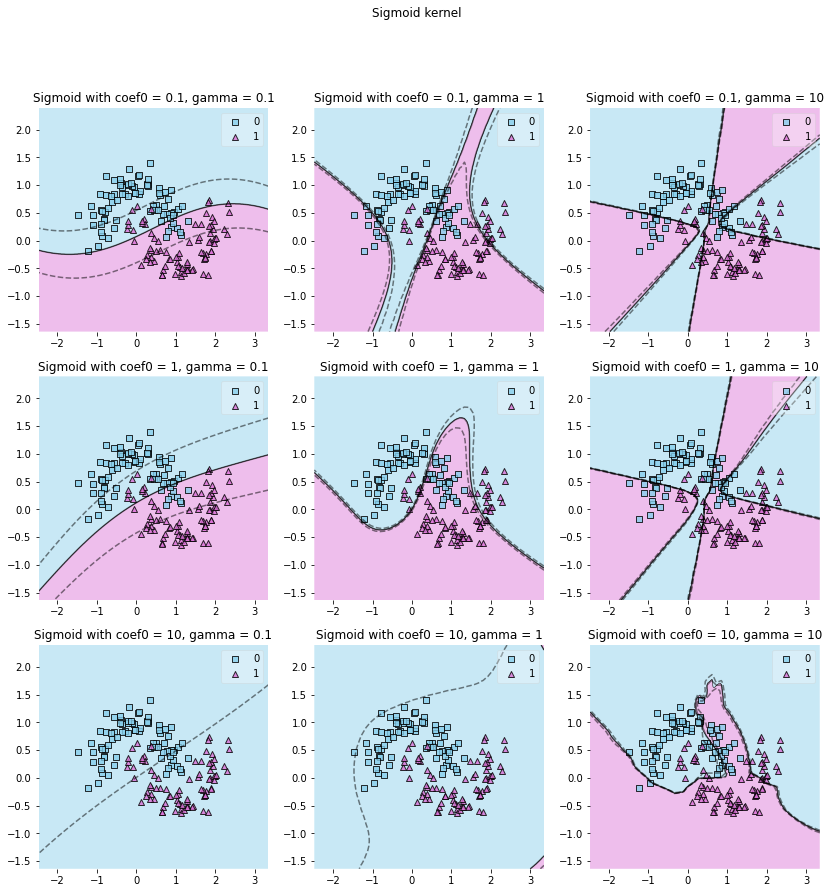

In [135]:
import itertools
import warnings

warnings.filterwarnings('ignore')

gs = gridspec.GridSpec(3, 3)
fig = plt.figure(figsize=(14, 14))

gamma = [10 ** -1, 1, 10]
coef = [10 ** -1, 1, 10]
grid = list(itertools.product(coef, gamma))
svm_sigmoid = [make_pipeline(StandardScaler(), SVC(kernel='sigmoid', coef0=coef, gamma=gamma, max_iter=500)) for coef, gamma in grid]

labels = ['Sigmoid with coef0 = {}, gamma = {}'.format(coef0, gamma) for coef0, gamma in grid]

for clf, lab, i in zip(svm_sigmoid, labels, np.arange(9)):
    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[i])
    fig = plot(X_test, y_test, clf=clf)
    plt.title(lab)

plt.suptitle("Sigmoid kernel")
plt.show()

**Note:** this method just not good with moon dataset.

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

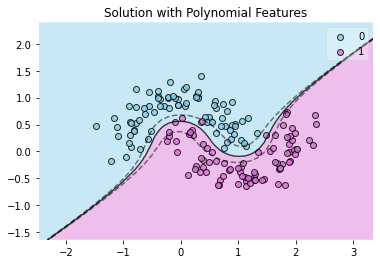

0.9818181818181818

In [207]:
from sklearn.preprocessing import PolynomialFeatures

pipe = make_pipeline(StandardScaler(), 
                     PolynomialFeatures(degree=3), 
                     LogisticRegression(C=1, penalty='l2', max_iter=500))
pipe.fit(X_train, y_train)
plot(X_test, y_test, pipe)
plt.title('Solution with Polynomial Features')
plt.show()
pipe.score(X_test, y_test)

**Note:** this workes exactly as Poly with degree = 3 and C = 1.

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

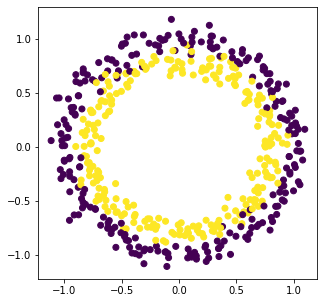

In [163]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)
X_train, X_test, y_train, y_test = train_test_split(circles_points, circles_labels, test_size=0.33, random_state=42)

0.9636363636363636

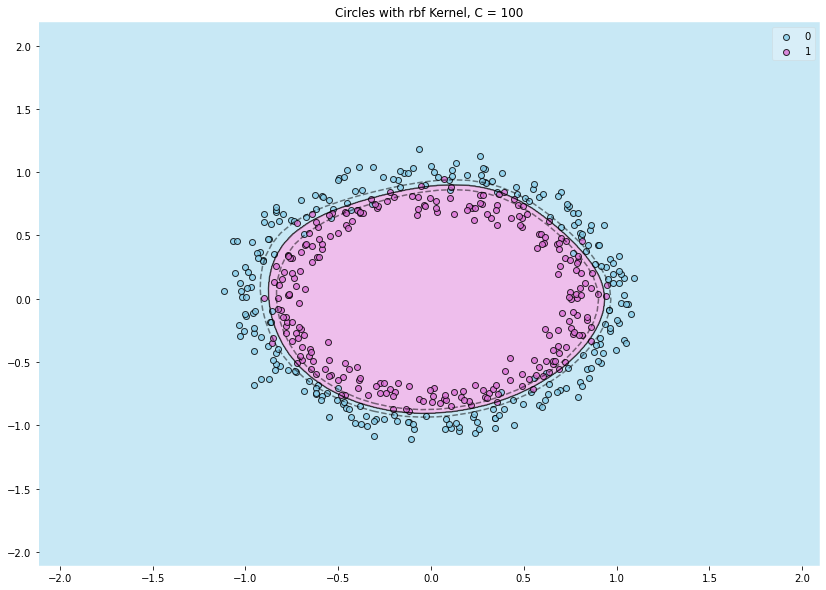

In [167]:
pipe = make_pipeline(StandardScaler(), SVC(C=100, kernel='rbf', max_iter=500))
pipe.fit(circles_points, circles_labels)
plt.figure(figsize=(14, 10))
plt.title('Circles with rbf Kernel, C = 100')
plot(circles_points, circles_labels, pipe)
pipe.score(X_test, y_test)

**Note:** not that hard. Rbf kernel is good with cirles. Accuracy = 0.96.

And even more:

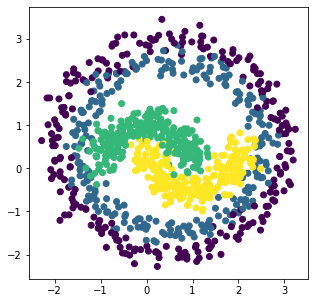

In [171]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

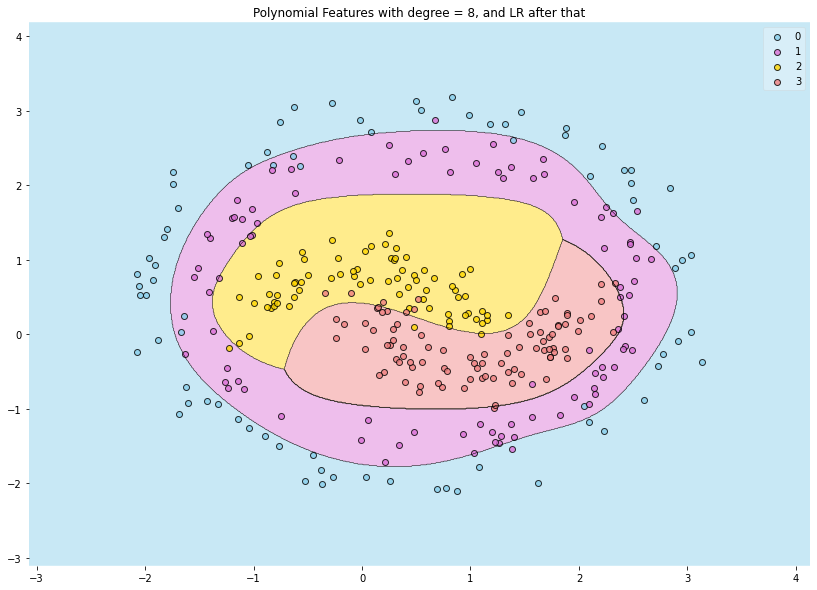

accuracy =  0.9121212121212121


In [196]:
X_train, X_test, y_train, y_test = train_test_split(points, labels, test_size=0.33, random_state=42)
pipe = make_pipeline(StandardScaler(), 
                     PolynomialFeatures(degree=8), 
                     LogisticRegression(penalty='l2', max_iter=500))
pipe.fit(X_train, y_train)
plt.figure(figsize=(14, 10))
plt.title('Polynomial Features with degree = 8, and LR after that', fontsize=16)
plot_decision_regions(X_test, y_test, pipe, colors="skyblue,orchid,gold,lightcoral", markers='o')
plt.show()
print('accuracy = ', pipe.score(X_test, y_test))

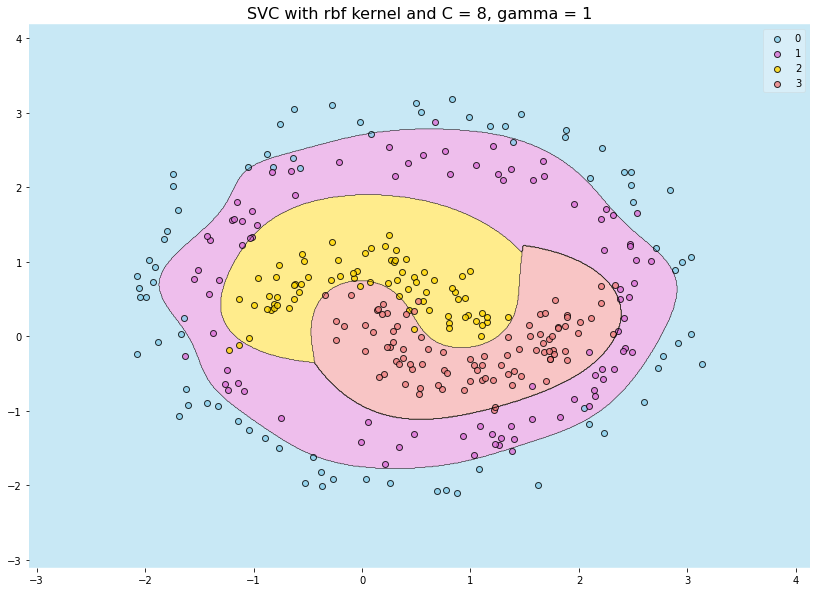

accuracy =  0.9272727272727272


In [199]:
pipe = make_pipeline(StandardScaler(), 
                    SVC(C=100, gamma=1, kernel='rbf', max_iter=500))
pipe.fit(X_train, y_train)
plt.figure(figsize=(14, 10))
plt.title('SVC with rbf kernel and C = 8, gamma = 1', fontsize=16)
plot_decision_regions(X_test, y_test, pipe, colors="skyblue,orchid,gold,lightcoral", markers='o')
plt.show()
print('accuracy = ', pipe.score(X_test, y_test))

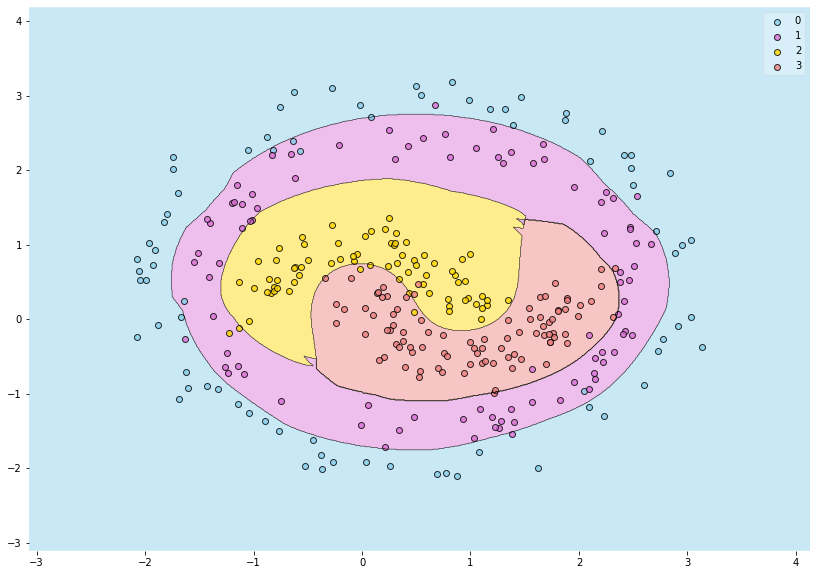

accuracy =  0.9333333333333333


In [202]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC

estimators = [('svr', make_pipeline(StandardScaler(), PolynomialFeatures(degree=3), LinearSVC(C=5))), ('svc', make_pipeline(StandardScaler(), 
                    SVC(C=100, gamma=1, kernel='rbf', max_iter=500)))]
clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
clf.fit(X_train, y_train)
plt.figure(figsize=(14, 10))
plot_decision_regions(X_test, y_test, clf, colors="skyblue,orchid,gold,lightcoral", markers='o')
plt.show()
print('accuracy = ', clf.score(X_test, y_test))

**Conclusion:** the last one gave the best score 0,93. From the plot we can see that classifier worked well.